In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing
%matplotlib inline

In [3]:
def scale_data(data):
    scaler = preprocessing.StandardScaler().fit(data)
    scaledData = scaler.transform(data)
    return scaledData

In [12]:
np.random.seed(50)
xs = np.random.normal(0,2,9950)
xo = np.random.normal(0,100,50)
xs = np.append(xs,xo)
ys = np.random.normal(0,2,9950)
yo = np.random.normal(0,100,50)
ys = np.append(ys,yo)
data = np.array([xs,ys])
X=data.T
X = scale_data(X)


In [122]:
data = np.array([xs,ys])
X=data.T

In [13]:
X

array([[ -5.55582229e-01,  -3.71470775e-01],
       [ -1.20548202e-02,   3.38339481e-02],
       [ -2.21718601e-01,   1.73932331e-01],
       ..., 
       [  6.50274920e+00,   3.24975372e+00],
       [  1.85034307e+01,   5.69938684e-01],
       [ -1.87630702e+00,   1.19565175e+00]])

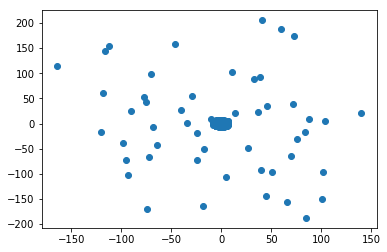

In [9]:
plt.scatter(xs,ys)

In [7]:
def eps_est(data,n=4,verbose=True):   
    # distance array containing all distances
    if verbose:print("Calculating nearest neighbor distances...")
    nbrs = NearestNeighbors(n_neighbors=int(max(n+1,100)), algorithm='ball_tree',n_jobs=-1).fit(data)
    distances, indices = nbrs.kneighbors(data)
    del nbrs
    distArr = distances[:,n]
    distArr.sort()
    del distances
    pts = range(len(distArr))

    # The following looks for the first instance (past the mid point)
    # where the mean of the following [number] points
    # is at least (cutoff-1)*100% greater than the mean of the previous [number] points.
    
    number = max(10,int(np.ceil(len(data)/500)))
    cutoff = max(distArr)/10
    if verbose:print("Finding elbow...")
    for i in range(int(np.ceil(len(pts)/2)),len(pts)-number):
        if np.mean(distArr[i+1:i+number])>=cutoff*np.mean(distArr[i-number:i-1]):
            dbEps = distArr[i]
            pt=pts[i]
            break

    if verbose:
        print("""
        Epsilon is in the neighborhood of {:05.2f}.
        """.format(dbEps))
    plt.scatter(range(len(distArr)),distArr)
    plt.scatter(pts[pt-number:pt+number],distArr[pt-number:pt+number])
    plt.scatter(pt,dbEps)
    return dbEps,distArr

Calculating nearest neighbor distances...
Finding elbow...

        Epsilon is in the neighborhood of 00.34.
        
34.6262010475


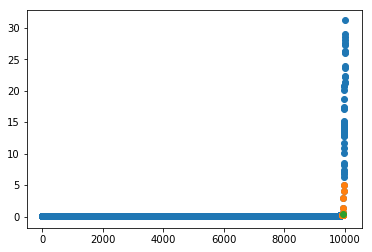

In [19]:
eps,dists = eps_est(X,n=20)

Cluster_density = 4/(eps**2)
print(Cluster_density)

Calculating nearest neighbor distances...
Finding elbow...

        Epsilon is in the neighborhood of 00.28.
        


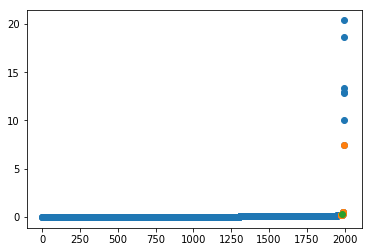

In [22]:

samp_inds = np.random.choice(range(len(xs)),2000,replace=False)
eps_samp,dists_samp = eps_est(X[samp_inds])
samp_cluster_density = 4*float(len(X))/float(len(samp_inds))/eps_samp**2


In [23]:
print(samp_cluster_density)

250.369186167


In [148]:
X_samp=X[samp_inds]

In [53]:
X_samp

array([[  1.72713207e+00,   4.30568173e-01],
       [  2.02025488e-01,  -1.82368137e-01],
       [ -1.41283521e+02,   7.16604969e+01],
       [  8.56931722e-01,   5.42468787e-01],
       [  2.44626474e+00,   4.25755200e+00],
       [  7.57463315e-01,   3.38543012e-01],
       [ -4.88512061e+00,  -1.19407450e+00],
       [ -9.92475738e-01,   1.74914818e+00],
       [  5.56459380e-01,  -1.90041719e-01],
       [  1.55984803e+02,  -1.42017689e+02],
       [  1.21919520e+00,  -6.58768113e-01],
       [ -8.11132841e-01,   8.22523441e-01],
       [  2.20419733e-01,  -2.02310392e+00],
       [  8.88557857e+01,  -4.34362993e+01],
       [ -1.07192319e+00,   1.79268828e+00],
       [ -2.25771678e+00,   2.92739901e+00],
       [ -4.53065587e-01,  -1.90239770e+00],
       [  1.75320579e+00,   3.24779071e+00],
       [ -2.57225860e+01,  -2.00128462e+01],
       [  1.00106219e+00,   6.81840435e-01],
       [  5.93260201e-01,  -1.25654567e+00],
       [  1.34828917e+02,  -1.06043620e+02],
       [  